In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [1]:
data = np.loadtxt('ECGu.txt')
print(data)
print(data.shape)

ECGmv = data * 1024
print(ECGmv)

fs = 1000
t = np.arange(ECGmv.shape[0]) / fs

num_leads = ECGmv.shape[1] if ECGmv.ndim > 1 else 1

fig, axes = plt.subplots(num_leads, 1, figsize=(12, 3 * num_leads), sharex=True)

if num_leads == 1:
    axes = [axes]  # Make it iterable

for i in range(num_leads):
    axes[i].plot(t, ECGmv[:, i] if num_leads > 1 else ECGmv)
    axes[i].set_ylabel(f'Lead {i+1} (mV)')
    axes[i].set_title(f'ECG Lead {i+1}')
    axes[i].grid()

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)
[[-281600. -121856. -121856.]
 [-281600. -121856. -121856.]
 [-281600. -120832. -123904.]
 ...
 [  -4096.  -84992.   21504.]
 [  -9216.  -90112.   31744.]
 [ -16384.  -98304.   33792.]]


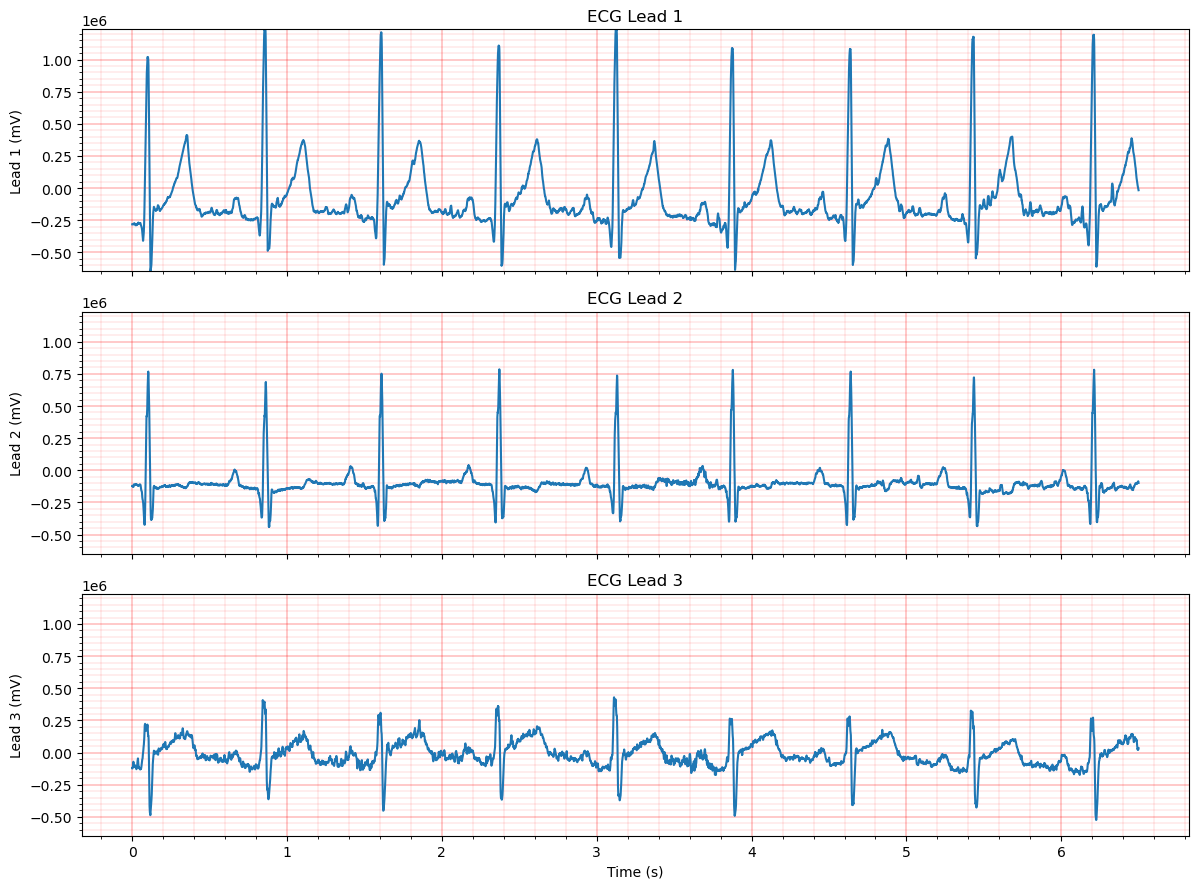

In [5]:
# ...existing code...
data = np.loadtxt('ECGu.txt')
print(data)
print(data.shape)

ECGmv = data * 1024
print(ECGmv)

fs = 1000
t = np.arange(ECGmv.shape[0]) / fs

num_leads = 3  # Force 3 subplots for 3 leads

fig, axes = plt.subplots(num_leads, 1, figsize=(12, 9), sharex=True)

if num_leads == 1:
    axes = [axes]  # Make it iterable

# Find global min and max for y-axis
ymin = np.min(ECGmv)
ymax = np.max(ECGmv)

for i in range(num_leads):
    from matplotlib.ticker import AutoMinorLocator
    axes[i].yaxis.set_minor_locator(AutoMinorLocator(5))  # 5 petits carreaux par grand
    axes[i].grid(which='minor', axis='y', color='red', linewidth=0.1)
    axes[i].xaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i].grid(which='minor', axis='x', color='red', linewidth=0.1)
    axes[i].plot(t, ECGmv[:, i])
    axes[i].set_ylabel(f'Lead {i+1} (mV)')
    axes[i].set_title(f'ECG Lead {i+1}')
    axes[i].set_ylim(ymin, ymax)
    axes[i].grid()
    axes[i].grid(color='red')
    axes[i].grid(which='major', color='red', linestyle='-', linewidth=0.3)
    

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()
# ...existing code...

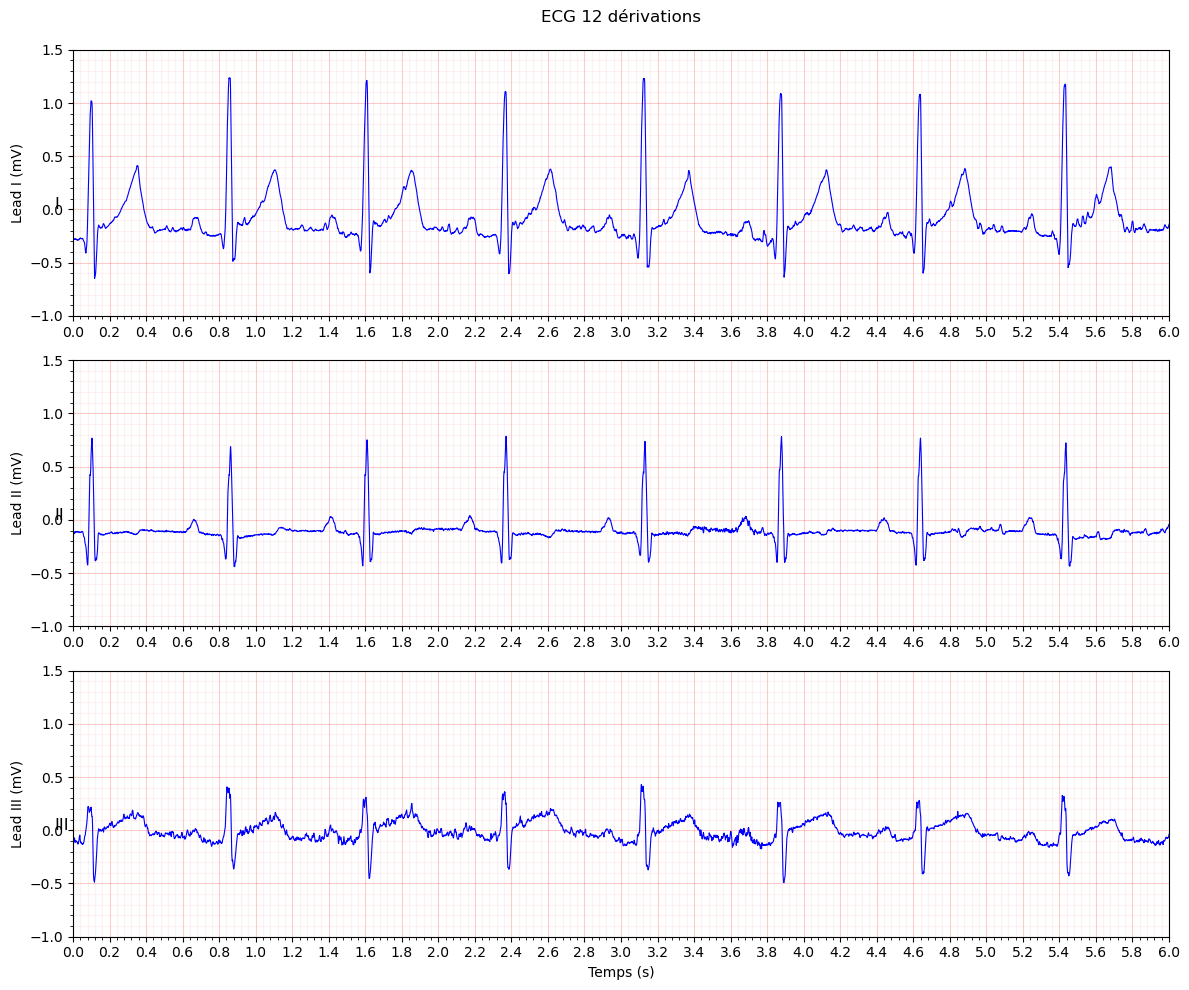

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Chargement du fichier ECG ---
data = np.loadtxt('ECGu.txt')
ECGs = [data[:, i] * 0.001024 for i in range(3)]  # Conversion en mV (Lead I, II, III)

# --- Création du vecteur temps ---
fs = 1000  # Fréquence d'échantillonnage
t = np.arange(len(ECGs[0])) / fs

# --- Configuration du style global ---
plt.style.use('default')
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# --- Paramètres pour chaque lead ---
lead_labels = ["I", "II", "III"]
ylabels = ["Lead I (mV)", "Lead II (mV)", "Lead III (mV)"]

# --- Boucle sur chaque axe/lead ---
for i, ax in enumerate(axes):
    # Grille (papier ECG)
    ax.grid(True, which='major', color='red', linestyle='-', alpha=0.2)
    ax.grid(True, which='minor', color='lightcoral', linestyle='-', alpha=0.1)
    ax.minorticks_on()
    ax.set_xticks(np.arange(0, 7, 0.2))      # Grands carreaux (0.20 s)
    ax.set_xticks(np.arange(0, 7, 0.04), minor=True)  # Petits carreaux (0.04 s)
    ax.set_yticks(np.arange(-1, 1.6, 0.5))   # Grands carreaux (0.5 mV)
    ax.set_yticks(np.arange(-1, 1.6, 0.1), minor=True)  # Petits carreaux (0.1 mV)

    # Tracé du signal
    ax.plot(t, ECGs[i], 'b-', linewidth=0.8)
    ax.set_ylabel(ylabels[i])
    ax.set_ylim(-1, 1.5)
    ax.set_xlim(0, 6)
    ax.text(-0.1, 0, lead_labels[i], fontsize=12)

    # Titre seulement sur le premier
    if i == 0:
        ax.set_title("ECG 12 dérivations", pad=20)
    # Légende de l'axe X seulement sur le dernier
    if i == len(axes) - 1:
        ax.set_xlabel("Temps (s)")

plt.tight_layout()
plt.show()
